# Coding data integration - Chemicals and River water data comparison

In order to perform integration task for the allergen/allergic data, we need to first extract the allergen data from the given chemicals, disease and the chemical disease database. This process yields smaller '.csv' files which helps us with the precise faster results.

### Isolating "Allergen" data from the provided "Disease database" --> CTD_diseases.csv 

In [1]:
import re
keywords = {"Allergy", "allergy","Allergic","allergic", "allergens","hypersensitivity","dermetitis","allerg","Allerg"}

keyre=re.compile("allerg",re.IGNORECASE)
with open("/home/abishek/data/CTD_diseases.csv") as infile:
    with open("/home/abishek/new_data.csv", "w") as outfile:
        outfile.write(infile.readline())  # Save the header
        for line in infile:
            if len(keyre.findall(line))>0:
                outfile.write(line) 

### Isolating "Allergen" data from the provided "Chemicals database" --> CTD_chemicals.csv 

In [2]:
import re
keywords = {"Allergy", "allergy","Allergic","allergic", "allergens","hypersensitivity","dermetitis","allerg","Allerg"}

keyre=re.compile("allerg",re.IGNORECASE)
with open("/home/abishek/data/CTD_chemicals.csv") as infile:
    with open("/home/abishek/new_data_chem.csv", "w") as outfile:
        outfile.write(infile.readline())  # Save the header
        for line in infile:
            if len(keyre.findall(line))>0:
                outfile.write(line) 

### Isolating "Allergen" data from the provided "Chemicals Diseases database"--> CTD_chemicals_diseases.csv 

In [3]:
import re
keywords = {"Allergy", "allergy","Allergic","allergic", "allergens","hypersensitivity","dermetitis","allerg","Allerg"}

keyre=re.compile("allerg",re.IGNORECASE)
with open("/home/abishek/data/CTD_chemicals_diseases.csv") as infile:
    with open("/home/abishek/new_data_chem_dis.csv", "w") as outfile:
        outfile.write(infile.readline())  # Save the header
        for line in infile:
            if len(keyre.findall(line))>0:
                outfile.write(line) 

Now when examined, there are some more data available in the extracted "CTD_chemicals.csv" and in "CTD_disease.csv" than in the extracted "CTD_chemicals_diseases.csv". These extra data must be integrated to the extracted "CTD_chemicals_diseases.csv" in order to get the precise results.


However the extracted "CTD_disease.csv" do not contain the chemical names to perform the comaprsion with the empodat water data. Therefore the extracted "CTD_chemicals_diseases.csv" and the extracted "CTD_chemicals.csv" are integrated and saved as "final_chem_dis.csv"

In [4]:
import numpy as np

def openFile(csvData):
    
    with open(csvData) as f:
        data = f.read()
    
    data = data.split('\n')
    
    return data

def findMeshData(data, return_index = False):
    
    meshData = []
    
    if return_index:
        indices = []
    
    for i in range(len(data)-1):
        if 'MESH' in data[i]:
            tmp = data[i].split(',')
            for j in tmp:
                if 'MESH' in j:
                    meshData.append(j)
                    if return_index:
                        indices.append(i)
                    
                    break
    if not return_index:
        return meshData
    else:
        return meshData, indices
    
def compareMeshData(d1, d2, return_index_irregularities = False, indexData = 0):
    
    irregularities = []
    
    if return_index_irregularities:
        indices = []
    
    for i in range(len(d1)):
        if not d1[i] in d2:
            irregularities.append(d1[i])
            indices.append(indexData[i])
    
    if not return_index_irregularities:
        return irregularities
    else:
        return irregularities, indices


diseaseData = openFile('/home/abishek/Desktop/data/new_data1.csv')
chemData = openFile('/home/abishek/Desktop/data/new_data_chem.csv')
chemDiseaseData = openFile('/home/abishek/Desktop/data/new_data_chem_dis.csv')

# Extract mesh ID and compare

diseaseMesh, indexD = findMeshData(diseaseData, True)
chemMesh, indexC = findMeshData(chemData, True)
chemDiseaseMesh, indexCM = findMeshData(chemDiseaseData, True)

# Find if any new mesh data is there in diseaseData and chemData by comparing to chemDiseaseData
# Get respective disease names for irreg1
# Get chemical names for irreg2

irreg1, irreg1index = compareMeshData(diseaseMesh, chemDiseaseMesh, True, indexD)
irreg2, irreg2index = compareMeshData(chemMesh, chemDiseaseMesh, True, indexC)

# Create new csv file with new data

fw = open('final_chem_dis.csv', 'w+')
for i in chemDiseaseData:
    fw.write(i + '\n')
for i in irreg2index:
    fw.write(chemData[i] + '\n')
    
fw.close()

In the next step the "empodat_surface-water_filtered-geo-concentration.csv" is taken into consideration and it is sorted based on the "concentration_value" column. We obtain 19626 chemicals with concentration>0 dissolved in water. Only these chemicals were taken into consideration for the further analysis.

In [5]:
#import numpy as np
#from testData import openFile

empodat = openFile('/home/abishek/Desktop/data/empodat_surface-water_filtered-geo-concentration.csv')

# get all concentration values

concVals = []

for i in range(1, len(empodat)):
    
    tryIndex = 24
    
    while True:
    
        try:
            concVals.append(float(empodat[i].split(',')[tryIndex]))
            found = True
        except:
            tryIndex += 1
            found = False
        
        if found:
            break
        if tryIndex > 35:
            break

# Sort empodat by concentration values (col 24)

empodat = empodat[1:]
sortedVals = np.argsort(concVals)[::-1]
concVals = np.array(concVals)
concVals = concVals[sortedVals]

# Write file with conc vals > 0

fw = open('water_data.csv', 'w+')
for i in range(len(sortedVals)):
    if concVals[i] > 0:
        fw.write(empodat[sortedVals[i]] + '\n')
        
fw.close()

Now based on the obtained concentation values, it is mapped to the chemicals in the "susdat_chemical_information.csv" database and only these chemicals with the dissolved concentation is taken into consideration for comparison with "final_chem_dis.csv"

In [7]:
#import numpy as np
#from testData import openFile

def openFileSus(csvData):
    
    with open(csvData) as f:
        data = f.read()
    
    data = data.split('NS00')
    
    for i in range(1, len(data)):
        data[i] = 'NS00' + data[i]
    
    return data

empodat = openFile('/home/abishek/Desktop/data/water_data.csv')
susdat = openFileSus('/home/abishek/Desktop/data/susdat_chemical_information.csv')
susdat = susdat[1:]

def getNORMANID(data):
    
    norman = []
    for i in range(len(data)):
        tmp = data[i].split(',')
        for j in tmp:
            if 'NS' in j:
                norman.append(j)
                break
    return norman

# Compare NORMAN ID from empodat and susdat

normanEmpodat = getNORMANID(empodat)
normansusDat = getNORMANID(susdat)

concVals = []

for i in range(1, len(empodat)):
    
    tryIndex = 24
    
    while True:
    
        try:
            concVals.append(float(empodat[i].split(',')[tryIndex]))
            found = True
        except:
            tryIndex += 1
            found = False

        if found:
            break
        if tryIndex > 35:
            break

# Sort empodat by concentration values (col 24)

empodat = empodat[1:]
sortedVals = np.argsort(concVals)[::-1]
concVals = np.array(concVals)
concVals = concVals[sortedVals]

fw = open('final_sus.csv', 'w+')

for i in range(len(normanEmpodat)):
# for i in range(10):
    for j in range(len(normansusDat)):
        if normanEmpodat[i] in normansusDat[j]:
            fw.write(susdat[j][:-1] + ',' + str(concVals[i]) + '\n')

fw.close()

# for i in range(len(empodat)-1):
    
    

IndexError: index 19525 is out of bounds for axis 0 with size 19525

In [8]:
#import numpy as np
#from testData import openFile

def openFileSus(csvData):
    
    with open(csvData) as f:
        data = f.read()
    
    data = data.split('NS00')
    
    for i in range(1, len(data)):
        data[i] = 'NS00' + data[i]
    
    return data

finalchemdis = openFile('final_chem_dis.csv')
finalchemdis = finalchemdis[2:]
finalsus = openFileSus('final_sus.csv')
finalsus = finalsus[1:]

chemdisNames = []

for i in range(len(finalchemdis)):
    chemdisNames.append(finalchemdis[i].split(',C' or ',D')[0].lower())

finalsusNames = []

for i in range(len(finalsus)):
    finalsusNames.append(finalsus[i].split(',')[1].lower())

counter = 0
for i in chemdisNames:
    if i in finalsusNames:
        if i in chemdisNames == i in finalsusNames:
            print(i)
            counter += 1

In [9]:
chemdisNames

['10-(2-pyrazolylethoxy)camptothecin',
 "10-(6'-ubiquinonyl)decyltriphenylphosphonium bromide",
 "10-(6'-ubiquinonyl)decyltriphenylphosphonium bromide",
 '10-(fluoroethoxyphosphinyl)-n-(biotinamidopentyl)decanamide',
 '"10h-3,6-diazaphenothiazine"',
 '10-hydroxycamptothecin',
 '"10-methoxy-2,2-dimethyl-2,6-dihydropyrano(3,2-c)quinolin-5-one"',
 '"10-methoxy-2,2-dimethyl-2,6-dihydropyrano(3,2-c)quinolin-5-one"',
 '10-nitro-oleic acid',
 '10-nitro-oleic acid',
 '10-nitro-oleic acid',
 '10-(octyloxy)decyl-2-(trimethylammonium)ethyl phosphate',
 '"1,10-phenanthroline"',
 '"1,10-phenanthroline"',
 '"1,10-phenanthroline"',
 '"1,10-phenanthroline"',
 '"1,10-phenanthroline"',
 '"1,1,1-trichloro-2-(4-hydroxyphenyl)-2-(4-methoxyphenyl)ethane"',
 '"1,12-benzoperylene"',
 '"1,12-benzoperylene"',
 '"1,1,4-tris(acetyloxy)-2-nonene"',
 '1-(1-acetyl-piperidine-4-yl)-3-adamantan-1-yl-urea',
 '1-(1-acetyl-piperidine-4-yl)-3-adamantan-1-yl-urea',
 '"1,1-bis(3\'-indolyl)-1-(4-chlorophenyl)methane"',
 '"1,

In [10]:
finalsusNames

['copper',
 'copper',
 'total phosphorous\xa0(p)',
 'total phosphorous\xa0(p)',
 'total phosphorous\xa0(p)',
 'nickel',
 'total phosphorous\xa0(p)',
 'zinc',
 'nickel',
 'total phosphorous\xa0(p)',
 'nickel',
 'nickel',
 'total phosphorous\xa0(p)',
 'total phosphorous\xa0(p)',
 'nickel',
 'mercury',
 'total phosphorous\xa0(p)',
 'nickel',
 'phenanthrene',
 'total phosphorous\xa0(p)',
 'total phosphorous\xa0(p)',
 'total phosphorous\xa0(p)',
 'zinc',
 '"2',
 'total phosphorous\xa0(p)',
 'nickel',
 'total phosphorous\xa0(p)',
 'nickel',
 'total phosphorous\xa0(p)',
 '"2',
 'zinc',
 'diisononyl phthalate',
 'zinc',
 'nickel',
 'zinc',
 'total phosphorous\xa0(p)',
 'total phosphorous\xa0(p)',
 'total phosphorous\xa0(p)',
 'total phosphorous\xa0(p)',
 'ethylenediaminetetraacetic acid (edta)',
 'chromium',
 'dibutyl phthalate',
 'total phosphorous\xa0(p)',
 'chromium',
 'chromium',
 'dibutyl phthalate',
 'dibutyl phthalate',
 'total phosphorous\xa0(p)',
 'total phosphorous\xa0(p)',
 'aminome

In [11]:
type(finalsusNames)

list

In [12]:
a=set(finalsusNames) & set(chemdisNames)
s = list(a)
print(s)

['tributyl phosphate', 'mecoprop', 'endosulfan sulfate', 'chloramine-t', 'quinoxyfen', 'naphthalene', 'benz(a)anthracene', 'methyl tert-butyl ether', 'tebuconazole', 'abamectin', 'diisononyl phthalate', 'prochloraz', 'glyphosate', 'bentazone', 'carbendazim', 'imidacloprid', 'metolachlor', 'cyprodinil', 'bisphenol a', 'fluoranthene', 'triadimefon', 'diflufenican', 'metaldehyde', 'isoproturon', 'diethyl phthalate', 'azoxystrobin', '4-chlorophenol', 'hexazinone', '2-nitrophenol', 'terbutylazine', 'pendimethalin', 'pyrene', 'aniline', 'phenanthrene', 'propachlor', 'chlorpyrifos-methyl', 'propylparaben', 'methylparaben', 'cyproconazole', 'propiconazole', 'iomeprol', 'oxadiazon']


In [13]:
import pandas as pd
import csv

df = pd.read_csv("/home/abishek/Desktop/data/final_sus.csv",sep=',')

/home/abishek/miniconda3/envs/teachopencadd/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (5,6,10,11,12,13,19,20,22,30,32,35,38,41,44,46,51,52) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [14]:
df['Name'] = df['Name'].str.lower()

In [15]:
ind = df[df['Name'].isin(s)].index

In [16]:
df=df.loc[ind,:]
df

,Norman_SusDat_ID,Name,Name_Dashboard,Name_ChemSpider,Name_IUPAC,Synonyms_ChemSpider,Reliability_of_Synonyms_ChemSpider,CAS_RN,CAS_RN_Dashboard,CAS_RN_PubChem,...,Exp_logKow_EPISuite,ChemSpider_ID_based_on_InChIKey,alogp_ChemSpider,xlogp_ChemSpider,Lowest_P-PNEC_(QSAR)_ug/L,Species,Uncertainty,ExposureScore_Water_KEMI,HazScore_EcoChronic_KEMI,ValidationLevel_KEMI
106,NS00000117,cyproconazole,Cyproconazole,cyproconazole,"2-(4-chlorophenyl)-3-cyclopropyl-1-(1,2,4-tria...",cyproconazole;SAN 619 F;UNII:622B9C3E6T;san-61...,6;4;4;2;2;2;2;2;2;2;2;2;2;2;1;1;1;1;0;0;0;0;0;...,CAS_RN: 94361-06-5,94361-06-5,94361-06-5;113096-99-4,...,2.90,77706.0,NaN,3.0,0.763960,Selenastrum capricornutum,Covered by Model\r,0.54,0.48,2.0
107,NS00000118,cyprodinil,Cyprodinil,cyprodinil,4-cyclopropyl-6-methyl-N-phenylpyrimidin-2-amine,cyprodinil;4-Cyclopropyl-6-methyl-N-phenylpyri...,4;4;4;2;2;2;2;2;1;1;1;1;0;0;0;0;0;0;0;0;0;0;0;...,CAS_RN: 121552-61-2,121552-61-2,121552-61-2,...,4.00,77885.0,NaN,2.5,0.184040,Selenastrum capricornutum,Covered by Model\r,0.49,0.34,2.0
201,NS00000220,propiconazole,Propiconazole,propiconazole,"1-[[2-(2,4-dichlorophenyl)-4-propyl-1,3-dioxol...",UNII:142KW8TBSR;Wocosin 50TK;Wocosin;Mycostat ...,4;4;4;4;4;4;4;3;2;2;2;2;2;2;2;2;2;2;1;1;0;0;0;...,CAS_RN: 60207-90-1,60207-90-1,60207-90-1;75881-82-2,...,3.72,39402.0,3.48,3.4,0.540450,Selenastrum capricornutum,Covered by Model\r,0.74,0.51,2.0
209,NS00000228,iomeprol,Iomeprol,Iomeprol,"1-N,3-N-bis(2,3-dihydroxypropyl)-5-[(2-hydroxy...","Iomeprol;N,N'-bis(2,3-dihydroxypropyl)-5-[(hyd...",4;4;4;1;1;0;0;0;0;0;0;0;0;0;0;0;0;0;0;0,CAS_RN: 78649-41-9,78649-41-9,78649-41-9,...,-2.79,3600.0,-2.52,-0.4,0.145840,Selenastrum capricornutum,Experimental proof is needed\r,0.02,NaN,2.0
217,NS00000236,bentazone,Bentazone,bentazone [JMAF],"2,2-dioxo-3-propan-2-yl-1H-2$l^{6},1,3-benzoth...","1H-2,1,3-Benzothiadiazin-4(3H)-one, 3-isopropy...",4;4;4;4;4;4;4;3;2;2;2;2;2;2;2;2;2;2;2;2;2;1;1;...,CAS_RN: 25057-89-0,25057-89-0,25057-89-0;12705-05-4;21723-40-0;58856-82-9,...,2.34,2238.0,1.86,1.2,6.098210,Selenastrum capricornutum,Covered by Model\r,0.50,0.12,2.0
229,NS00000248,metolachlor,Metolachlor,"metolachlor [ANSI, WSSA]",2-chloro-N-(2-ethyl-6-methylphenyl)-N-(1-metho...,"Bicep;metolachlor [ANSI, WSSA];2-Chloro-N-(2-e...",6;4;4;4;4;4;4;4;4;3;2;2;2;2;2;2;2;2;2;2;2;2;2;...,CAS_RN: 51218-45-2,51218-45-2,51218-45-2;82535-90-8;164201-38-1;55762-76-0;6...,...,2.90,4025.0,NaN,NaN,1.798190,Selenastrum capricornutum,Covered by Model\r,0.28,0.22,2.0
239,NS00000258,terbutylazine,Terbutylazine,Terbuthylazine,"2-N-tert-butyl-6-chloro-4-N-ethyl-1,3,5-triazi...",Terbuthylazine;Terbutylazine;Gardoprim;Sorgopr...,6;4;4;4;4;4;4;3;2;2;2;2;1;1;1;1;1;1;0;0;0;0;0;...,CAS_RN: 5915-41-3,5915-41-3,5915-41-3;63026-57-3,...,3.21,20848.0,3.33,NaN,0.022130,Selenastrum capricornutum,Experimental proof is needed\r,0.58,0.32,2.0
241,NS00000260,isoproturon,Isoproturon,Isoproturon,"1,1-dimethyl-3-(4-propan-2-ylphenyl)urea","1,1-dimethyl-3-[4-(propan-2-yl)phenyl]urea;N-(...",4;4;4;4;4;4;4;2;2;2;2;2;2;1;1;1;1;0;0;0;0;0;0;...,CAS_RN: 34123-59-6,34123-59-6,34123-59-6,...,2.87,33695.0,2.63,2.5,1.216670,Daphnia magna,Covered by Model\r,0.65,0.42,2.0
258,NS00000277,mecoprop,Mecoprop,Mecoprop,2-(4-chloro-2-methylphenoxy)propanoic acid,Mecoprop;2-(2-Methyl-4-chlorophenoxy)propionic...,4;4;4;3;3;3;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;...,CAS_RN: 93-65-2,93-65-2,93-65-2;7085-19-0,...,3.20,6886.0,2.87,2.7,5.910150,Pimephales promelas,Covered by Model\r,0.25,0.32,2.0
261,NS00000280,tebuconazole,Tebuconazole,tebuconazole,"1-(4-chlorophenyl)-4,4-dimethyl-3-(1,2,4-triaz...",UNII:401ATW8TRW;BAY HWG 1608;a-[2-(4-Chlorophe...,4;4;4;4;3;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;2;...,CAS_RN: 107534-96-3,107534-96-3,107534-96-3;80443-41-0,...,3.70,77680.0,NaN,3.4,0.342730,Selenastrum capricornutum,Covered by Model\r,0.70,0.39,2.0


In [17]:
df.loc[:,:"Name"].to_csv('/home/abishek/Desktop/file2.csv')

In [18]:
df.loc[:,"Concentration_Values":].to_csv('/home/abishek/Desktop/file3.csv')

In [19]:
a = pd.read_csv("/home/abishek/Desktop/file2.csv")
b = pd.read_csv("/home/abishek/Desktop/file3.csv.csv")

merged = a.merge(b, on='ID')

merged.to_csv('/home/abishek/Desktop/file.csv', index=False)

In [22]:
df = pd.read_csv("/home/abishek/Desktop/file.csv",sep=',')
df

,Unnamed: 0,Norman_SusDat_ID,Name,Concentration_Values
0,106,NS00000117,cyproconazole,0.08100
1,107,NS00000118,cyprodinil,0.87000
2,201,NS00000220,propiconazole,4.70000
3,209,NS00000228,iomeprol,0.36000
4,217,NS00000236,bentazone,30.00000
5,229,NS00000248,metolachlor,52.00000
6,239,NS00000258,terbutylazine,30.40000
7,241,NS00000260,isoproturon,3.19000
8,258,NS00000277,mecoprop,0.33000
9,261,NS00000280,tebuconazole,0.99000


[Text(0, 0, 'cyproconazole'),
 Text(1, 0, 'cyprodinil'),
 Text(2, 0, 'propiconazole'),
 Text(3, 0, 'iomeprol'),
 Text(4, 0, 'bentazone'),
 Text(5, 0, 'metolachlor'),
 Text(6, 0, 'terbutylazine'),
 Text(7, 0, 'isoproturon'),
 Text(8, 0, 'mecoprop'),
 Text(9, 0, 'tebuconazole'),
 Text(10, 0, 'propachlor'),
 Text(11, 0, 'imidacloprid'),
 Text(12, 0, 'chlorpyrifos-methyl'),
 Text(13, 0, 'pendimethalin'),
 Text(14, 0, 'methylparaben'),
 Text(15, 0, 'propylparaben'),
 Text(16, 0, 'diisononyl phthalate'),
 Text(17, 0, 'glyphosate'),
 Text(18, 0, 'metaldehyde'),
 Text(19, 0, 'methyl tert-butyl ether'),
 Text(20, 0, 'naphthalene'),
 Text(21, 0, 'oxadiazon'),
 Text(22, 0, 'diflufenican'),
 Text(23, 0, 'bisphenol a'),
 Text(24, 0, 'phenanthrene'),
 Text(25, 0, 'azoxystrobin'),
 Text(26, 0, 'diethyl phthalate'),
 Text(27, 0, 'endosulfan sulfate'),
 Text(28, 0, 'tributyl phosphate'),
 Text(29, 0, 'carbendazim'),
 Text(30, 0, '4-chlorophenol'),
 Text(31, 0, 'quinoxyfen'),
 Text(32, 0, '2-nitrophenol

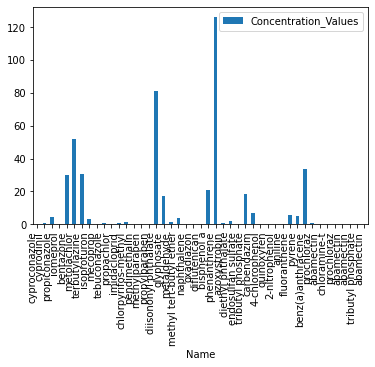

In [46]:
ax = df.plot.bar(x="Name", y='Concentration_Values', rot=0)
ax.set_xticklabels(df['Name'], rotation=90, ha='right')

The concentration values are in μg/l

### Reference